## Project title: “COMPARISON OF COMPLEX CONVOLUTIONAL NEURAL NETWORKS, REAL CONVOLUTIONAL NEURAL NETWORKS, SVM AND RF METHODS FOR COMPLEX-BASED 2D PROTEIN PATTERN IMAGE CLASSIFICATION.
#### DESCRIPTION
In this study, we propose a new complex-based approach for 2D representation of amino acid sequences. To investigate the representativeness of this new approach, amino acid sequences of kinase and GPCR protein families are converted into 2D images. These 2D protein images are classified using Real-valued Convolutional Neural Networks, Complex-valued Convolutional Neural Networks, Support Vector Machines and Random Forest machine learning methods. The results are compared statistically.
## THE STUDY PROCEEDS IN THE FOLLOWING STEPS:
##### STEP 1 (DATA IMPORT):
Amino acid sequences of kinase and GPCR proteins are imported from the NCBI gene bank in separate fasta form using accession numbers. 
##### STEP 2 (DATA PREPROCESSING):
Amino acid sequences of kinase and GPCR proteins are labeled as “1” and “0”, randomly shuffled and saved as a single data frame in fasta format.
##### STEP 3 (COMPLEX CODING):
The data frame in fasta format is converted to complex numbers by the proposed 2D Complex Coding Method and saved as a complex-valued data frame.
##### STEP 4 (CONVERSION TO 2B IMAGES):
The amino acid sequences converted into complex numbers are converted into 2D images to form a meaningful and distinct pattern unique to each protein and given as input to neural networks. The images are labeled and saved as a new 2D image data frame.
##### STEP 5 (2D PROTEIN CLASSIFICATION with Reel-CNN):
2D complex image data representing kinase and GPCR proteins are classified using Reel-Valued Convolutional Neural Networks. 
##### STEP 6 (2D PROTEIN CLASSIFICATION with Complex Valued-CNN):
2D complex image data representing kinase and GPCR proteins are classified using Complex-Valued Convolutional Neural Networks.
##### STEP 7 (2D PROTEIN CLASSIFICATION with SVM):
2D complex image data representing kinase and GPCR proteins are classified using Support Vector Machines (SVM).
##### STEP 8 (2D PROTEIN CLASSIFICATION with RF):
2D complex image data representing kinase and GPCR proteins are classified using Random Forest (RF).
##### STEP 9 STATISTICAL ANALYSIS
The means and standard deviations of the metric results obtained by running the networks of each machine learning method 10 times are calculated. It is investigated whether there is a statistically significant difference between them.


## STEP 1 (DATA IMPORT):
#### For the KİNASE protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

In [ ]:
#For the KİNASE protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx", index=False)

- Below are the first five lines of the KİNAZ amino acid sequences downloaded to the file, printed with .head():

In [1]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)
 
print(output_data.head())

    Accession                                           Sequence
0  CAA77753.1  MVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISP...
1  CAA77752.1  MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...
2  CAA42411.1  MAEKGDCIASVYGYDLGGRFVDFQPLGFGVNGLVLSAVDSRACRKV...
3  CAA33389.1  MPFSNSHNALKLRFPAEDEFPDLSAHNNHMAKVLTPELYAELRAKS...
4  CAA42556.1  MSAIQAAWPSGTECIAKYNFHGTAEQDLPFCKGDVLTIVAVTKDPN...


#### For the GPCR protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

In [ ]:

#For the GPCR protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx", index=False)

- Below are the first five lines of the GPCR amino acid sequences downloaded to the file, printed with .head():

In [2]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  CAA77746.1  MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSI...
1  CAA40530.1  MNSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAV...
2  CAA38699.1  MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQ...
3  CAA39286.1  MRTLNTSAMDGTGLVVERDFSVRILTACFLSLLILSTLLGNTLVCA...
4  CAA45319.1  METNFSTPLNEYEEVSYESAGYTVLRILPLVVLGVTFVLGVLGNGL...


## STEP 2 (DATA PREPROCESSING):¶
#### The amino acid sequences of the Kinase and GPCR proteins in two different files are labelled "1" and "0", randomly shuffled and saved in a new file as a single data frame in fasta form.

In [ ]:
#Amino acid fasta sequences of kinase and GPCR protein families are labelled as "1" and "0", randomly shuffled, and saved as a single dataframe.

#Dataframe for Amino acid 

import pandas as pd
from sklearn.utils import shuffle

# Step 1: Load and labelling data
kinaz_df = pd.read_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx")
kinaz_df['label'] = 1

gpcr_df = pd.read_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx")
gpcr_df['label'] = 0

# Step 2: Limit protein sequences to 300 characters
#kinaz_df['Sequence'] = kinaz_df['Sequence'].str[:300]
#gpcr_df['Sequence'] = gpcr_df['Sequence'].str[:300]

# Step 3: Combine data and shuffle randomly
combined_df = pd.concat([kinaz_df, gpcr_df])
shuffled_df = shuffle(combined_df)

# Step 4: Save data to Excel file
shuffled_df.to_excel("D:\datasetTEZ\KİNASE_GPCR_Fasta_AAcid.xlsx", index=False)



- The first five lines of the dataframe for the KINASE (1) and GPCR (0) amino acid sequences are as follows

In [3]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_Fasta_AAcid.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence  label
0  AAA60001.1  MEPHDSSHMDSEFRYTLFPIVYSIIFVLGVIANGYVLWVFARLYPC...      0
1  AAA36449.1  MSKPHSEAGTAFIQTQQLHAAMADTFLEHMCRLDIDSPPITARNTG...      1
2  AAC50158.1  MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSED...      0
3  AAA63906.1  MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSED...      0
4  CAA47004.1  MKKFKRRLSLTLRGSQTIDESLSELAEQMTIEENSSKDNEPIVKNG...      1


## STEP 3 (COMPLEX CODİNG):¶
#### The dataframe in categorical (Fasta) form is converted into complex numbers by the proposed Complex Coding Method and saved as a complex-valued dataframe in the following user file path.

In [ ]:
# coding to complex numbars
import pandas as pd
import cmath
import numpy as np
import random

# 20 farklı amino asidi sırasıyla -10,-9,...,-1,1,2,...,10 amplitude değerine eşler
def encode_sequence(sequence):
    valid_amino_acids = 'WFLIVMPAGCSTYNQHKRDE'
    amplitude_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    
    encoded = []
    for i, aa in enumerate(sequence):
        if aa == 'X':  # X olanlar için rastgele amino asit seç
            aa = random.choice(valid_amino_acids)
        if aa in valid_amino_acids:
            r = amplitude_values[valid_amino_acids.index(aa)]  # Amplitude: önceden tanımlanan amplitude değerine göre
            theta = cmath.pi * 2 * (i + 1) / len(sequence)  # Phase: dizideki sırasına göre
            encoded.append(cmath.rect(r, theta))
        else:
            print(f"Warning: Invalid amino acid '{aa}' encountered in sequence. Skipping.")
    return encoded

# Her dizinin uzunluğunu hesapla
def calculate_sequence_length(sequence):
    return len(sequence)

# Kompleks sayının bileşenlerini hesaplar
def get_components(complex_list):
    reals = [round(cplx.real, 5) for cplx in complex_list]
    imags = [round(cplx.imag, 5) for cplx in complex_list]
    mods = [round(abs(cplx), 5) for cplx in complex_list]
    args = [round(cmath.phase(cplx), 5) for cplx in complex_list]
    return reals, imags, mods, args

# Veriyi oku
combined_df = pd.read_excel("D:\\datasetTEZ\\KİNASE_GPCR_Fasta_AAcid.xlsx")

# Her dizinin uzunluğunu hesapla ve yeni sütun ekle
combined_df['Sequence_Length'] = combined_df['Sequence'].apply(calculate_sequence_length)

# Kompleks sayı listesini oluştur
combined_df['Complex'] = combined_df['Sequence'].apply(encode_sequence)

# Kompleks sayıların bileşenlerini hesapla ve yeni sütunlara ekle
combined_df['Real'], combined_df['Imag'], combined_df['Mod'], combined_df['Arg'] = zip(*combined_df['Complex'].apply(get_components))

# Kompleks sayılarla kodlanmış veriyi yeni dosyaya kaydet
combined_df.to_excel("D:\\datasetTEZ\\KİNASE_GPCR_Pattern2_COMPLEX_AAcid.xlsx", index=False)


- The first 5 lines of the data frame, which consists of amino acids coded into complex numbers, are given below:

In [45]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\\datasetTEZ\\KİNASE_GPCR_Pattern2_COMPLEX_AAcid.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence  label  \
0  AAA60001.1  MEPHDSSHMDSEFRYTLFPIVYSIIFVLGVIANGYVLWVFARLYPC...      0   
1  AAA36449.1  MSKPHSEAGTAFIQTQQLHAAMADTFLEHMCRLDIDSPPITARNTG...      1   
2  AAC50158.1  MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSED...      0   
3  AAA63906.1  MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSED...      0   
4  CAA47004.1  MKKFKRRLSLTLRGSQTIDESLSELAEQMTIEENSSKDNEPIVKNG...      1   

   Sequence_Length                                            Complex  \
0              342  [(5.9989874497999365+0.11022512028958417j), (1...   
1              531  [(5.999579963644123+0.07099478741409633j), (10...   
2              380  [(5.999179829954814+0.09920366859815077j), (18...   
3              380  [(5.999179829954814+0.09920366859815077j), (18...   
4              523  [(5.999567015459638+0.07208069789295209j), (16...   

                                                Real  \
0  [5.99899, 19.9865, 6.98937, 15.95682, 18.91989...  

## STEP 4 (TRANSFORM TO 2D PATTERN IMAGES):
#### Amino acid sequences encoded in complex numbers are transformed into a complex-based 2D image with a different pattern specific to each protein and saved as an imag-data frame.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os

def plot_and_save_complex_numbers_with_labels(file_path, save_path):
    # Excel dosyasını oku
    df = pd.read_excel(file_path, header=0)

    # Convert string expressions in 'Complex' column to list
    df['Complex'] = df['Complex'].apply(ast.literal_eval)
    
    #Create save directory
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for index, row in df.iterrows():
        # Complex number sequence and labels
        complex_numbers = row['Complex']
        label = row['label']

        # Part of Real and Imaginary 
        real_parts = [c.real for c in complex_numbers]
        imaginary_parts = [c.imag for c in complex_numbers]

        # Graphic drawing
        plt.figure(figsize=(10, 10), dpi=400)  # Higher DPI for better quality
        plt.scatter(real_parts, imaginary_parts, color='blue', s=15, alpha=0.8, edgecolor='k')  # Adjusted size and transparency
        plt.xlabel('Real Part', fontsize=14)  # Increased font size for better readability
        plt.ylabel('Imaginary Part', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.6)  # Optional: Add a grid for better visualization
        plt.axis('off')

        # Saving graphics
        filename = os.path.join(save_path, f'plot_{index+1}_label_{label}.png')
        plt.savefig(filename, format='png', bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f'Saved: {filename}')

file_path = r"D:\\datasetTEZ\\KİNASE_GPCR_Pattern2_COMPLEX_AAcid.xlsx"
save_path = r"D:\2Dprotein_Pattern25_IMAGE"

plot_and_save_complex_numbers_with_labels(file_path, save_path)


- Four complex-2D images representing the amino acid sequence of the four protein samples are printed below.

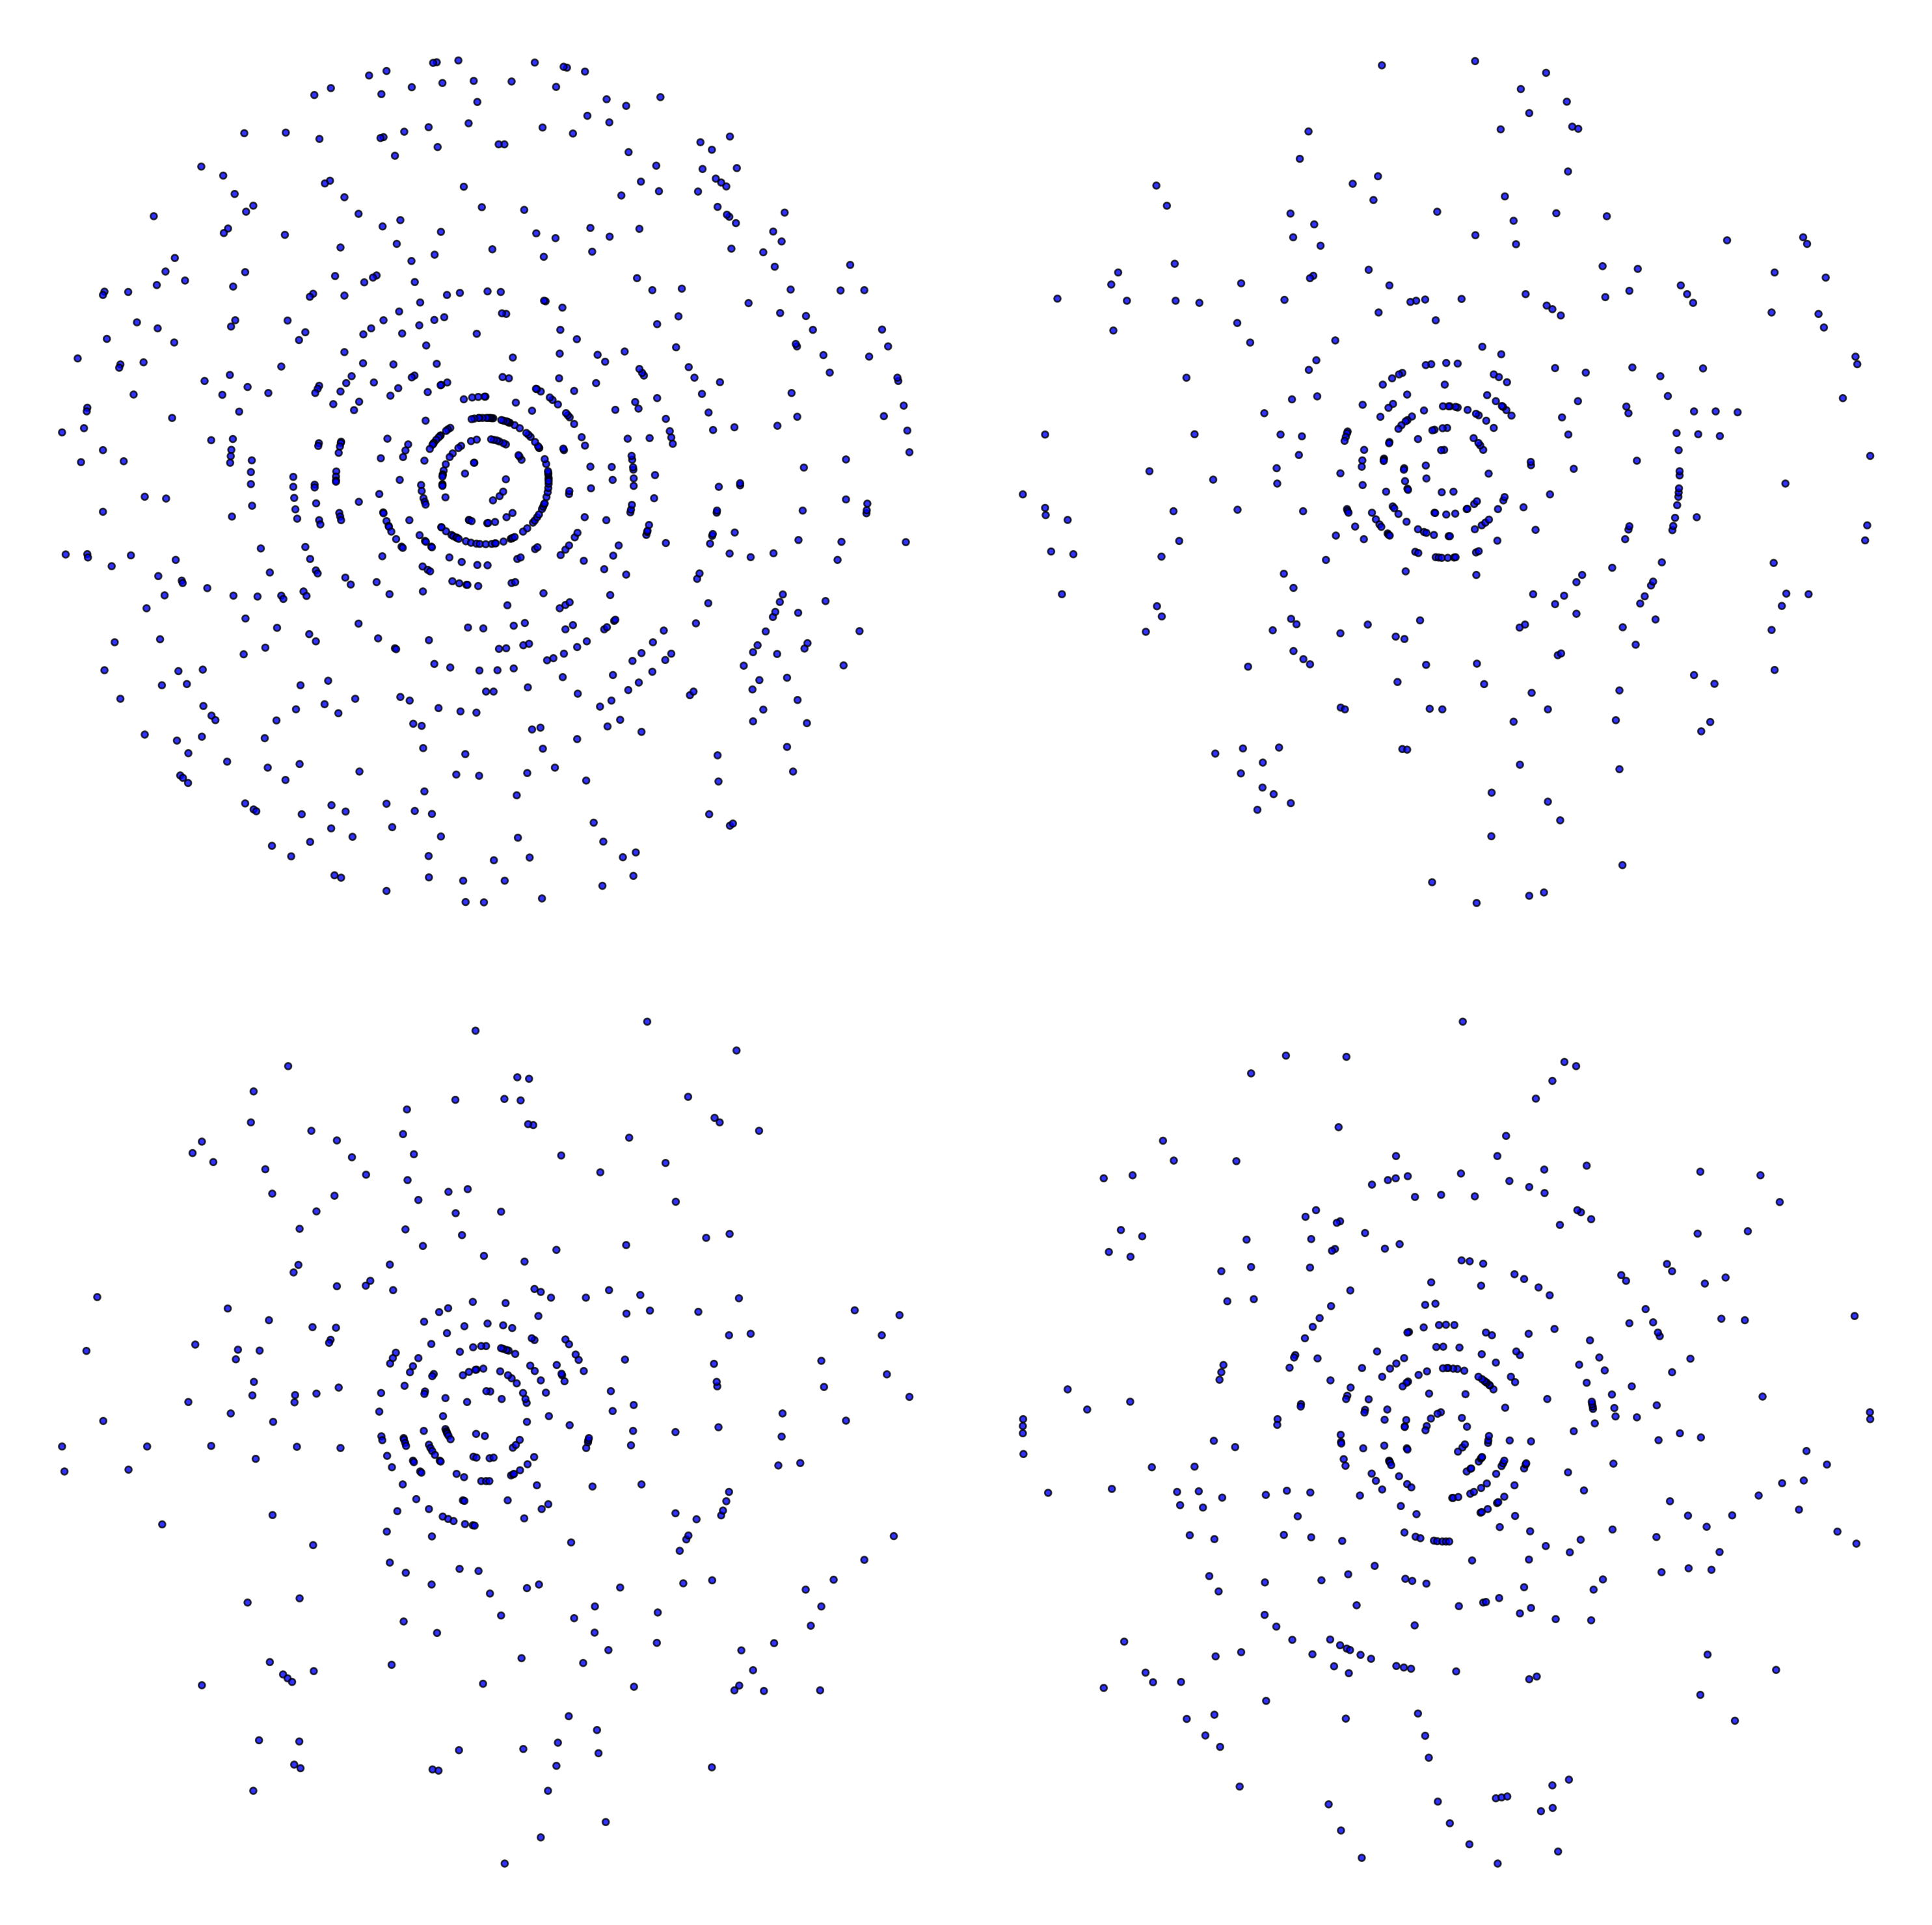

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Folder path
folder_path = r"D:\2Dprotein_Pattern25_IMAGE"

# Get and sort files in folder
file_list = os.listdir(folder_path)
file_list.sort()

# Image file extensions
image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif']

# Show four images as output
num_images_to_show = 4
image_files = [file for file in file_list if os.path.splitext(file)[1].lower() in image_extensions]

if len(image_files) >= num_images_to_show:  # Klasörde yeterli dosya varsa
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=300)  # 300 DPI ile daha yüksek kalite
    axes = axes.flatten()  # axes'i tek boyutlu diziye dönüştür
    for i in range(num_images_to_show):
        file_path = os.path.join(folder_path, image_files[i])
        img = Image.open(file_path).convert('RGB')  # Renk doğruluğu için RGB formatına çevir
        axes[i].imshow(img)
        axes[i].axis('off')  # Eksenleri kapat
    plt.tight_layout()  # Daha iyi düzenleme için
    plt.savefig("high_quality_images.png", dpi=300)  # Görüntüleri kaydet
    plt.show()
else:
    print("Not enough images found in the folder.")


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## STEP 5 (Real-Conv. NN-CLASSIFICATION):
#### 2D complex image data representing kinase and GPCR proteins are classified using Reel-Valued Convolutional Neural networks (R-CNN).

In [54]:
#2D REEL-Convolutional Neural networks for classicifation-Complex-based Image data representing kinase and GPCR proteins are classified using .
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Uploading images and labels
data_dir = "D:/2Dprotein_Pattern25_IMAGE"
img_height, img_width = 64, 64
images = []
labels = []

for file in os.listdir(data_dir):
    if file.endswith(".png"):
        label = int(file.split('_')[-1].split('.')[0])
        img_path = os.path.join(data_dir, file)
        img = load_img(img_path, color_mode='grayscale', target_size=(img_height, img_width))
        img = img_to_array(img)
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Separation of the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encoding of labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Creation of Convolutional Neural Network Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
5/5 [==============================] - 2s 109ms/step - loss: 84.7393 - accuracy: 0.5938 - val_loss: 43.4112 - val_accuracy: 0.4750
Epoch 2/50
5/5 [==============================] - 0s 45ms/step - loss: 17.0068 - accuracy: 0.5437 - val_loss: 1.7528 - val_accuracy: 0.5500
Epoch 3/50
5/5 [==============================] - 0s 41ms/step - loss: 6.3056 - accuracy: 0.5250 - val_loss: 1.1476 - val_accuracy: 0.5250
Epoch 4/50
5/5 [==============================] - 0s 42ms/step - loss: 0.9446 - accuracy: 0.4938 - val_loss: 0.7846 - val_accuracy: 0.6000
Epoch 5/50
5/5 [==============================] - 0s 38ms/step - loss: 0.7459 - accuracy: 0.5625 - val_loss: 0.7814 - val_accuracy: 0.4750
Epoch 6/50
5/5 [==============================] - 0s 45ms/step - loss: 0.6562 - accuracy: 0.5875 - val_loss: 0.5971 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 0s 49ms/step - loss: 0.5490 - accuracy: 0.7375 - val_loss: 0.4948 - val_accuracy: 0.8000
Epoch 8/50
5/5 [=======

2/2 [==============================] - 0s 8ms/step


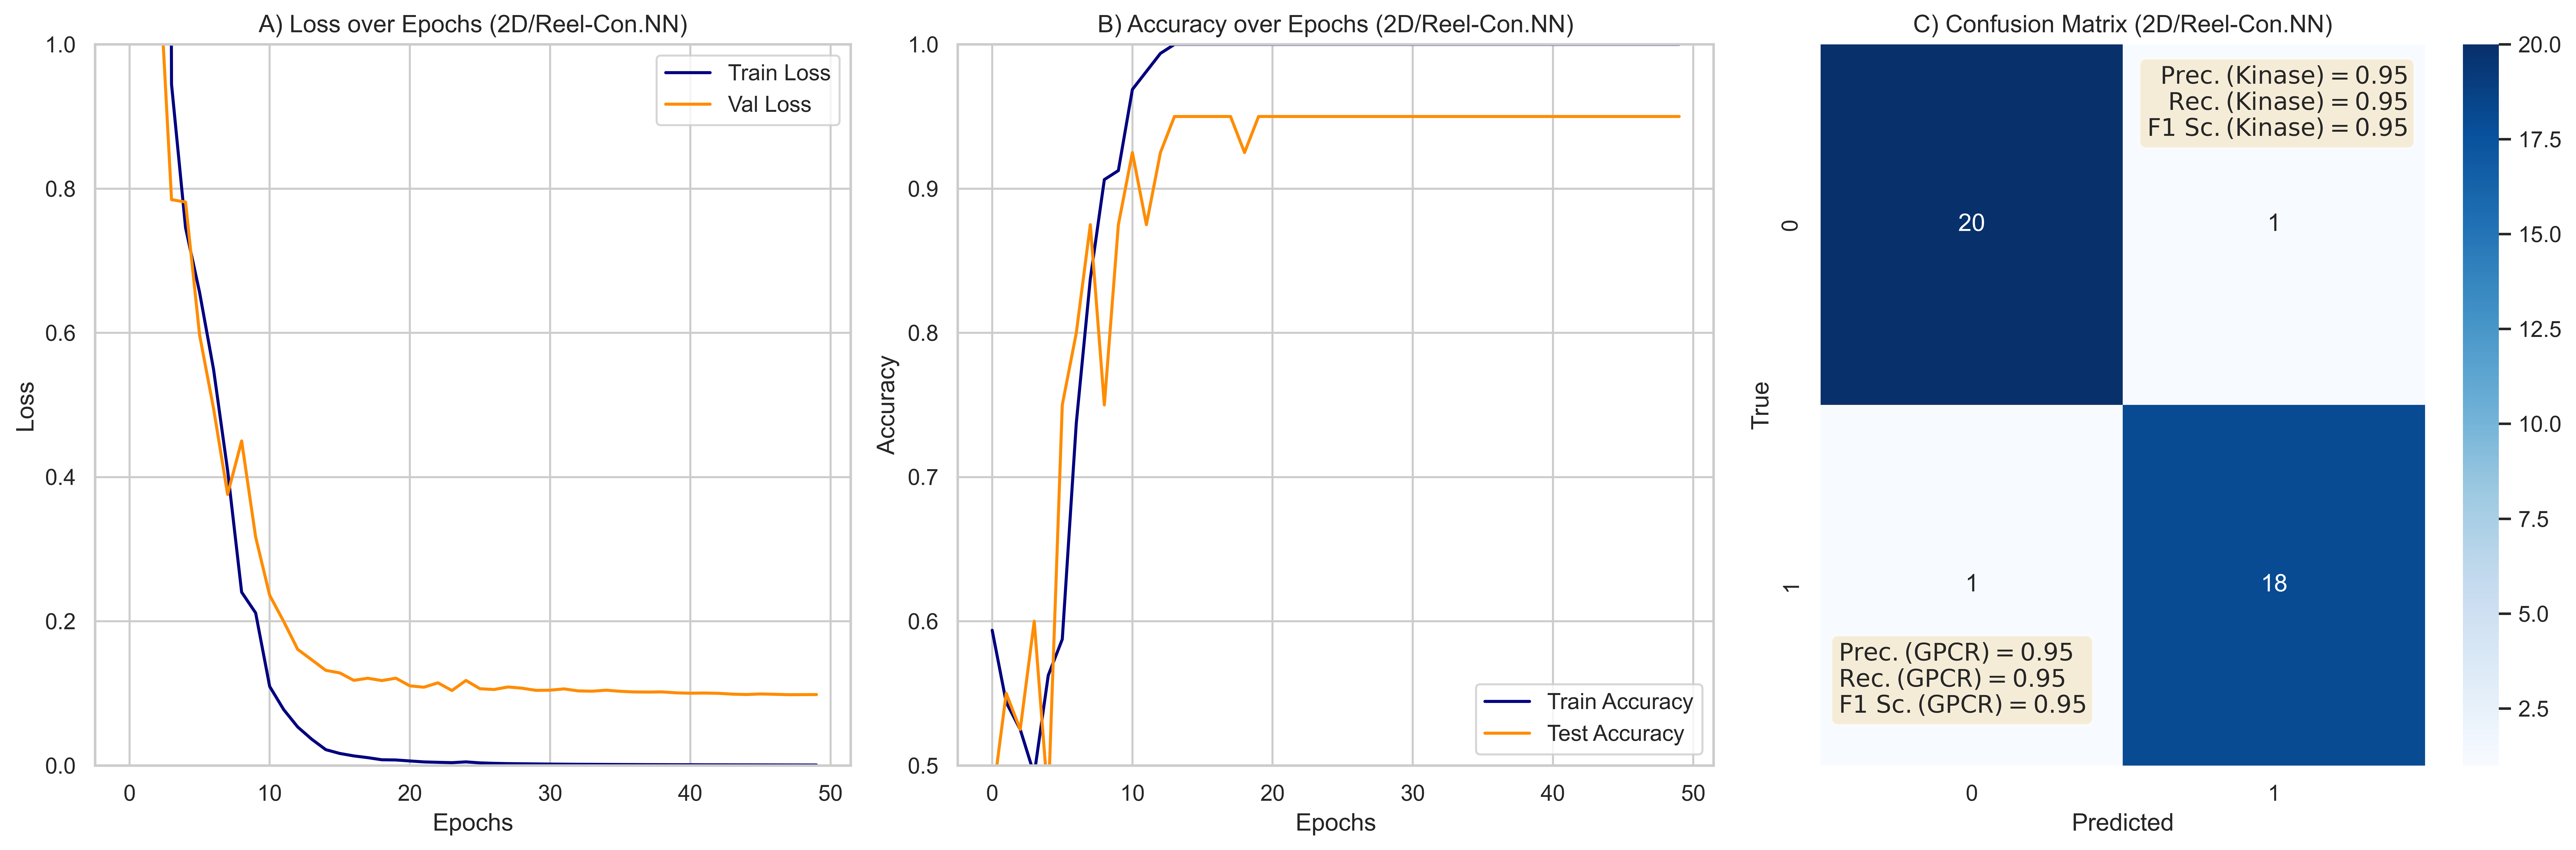

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Tahmin edilen ve gerçek değerlerin sınıflandırılması
y_pred_classes = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_classes, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Karışıklık matrisi hesaplama
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Her sınıf için Precision, Recall ve F1 Skorlarını hesaplama
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0)
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0)
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0)

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1)
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1)
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1)

# Metriklerin metin olarak hazırlanması
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Eğitim ve doğrulama verilerindeki metriklerin hazırlanması
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Metriklerin hazırlanması
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average="macro"))))

# Görselleştirme
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

# Kayıp Grafiği
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (2D/Reel-Con.NN)')
ax[0].set_ylim(0.0, 1.0)

# Doğruluk Grafiği
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (2D/Reel-Con.NN)')
ax[1].set_ylim(0.5, 1.0)

# Karışıklık Matrisinin Görselleştirilmesi
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (2D/Reel-Con.NN)')

# Metin kutularının eklenmesi
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()


- Numerical results and graphs of image classification with convolutional neural networks are given

## STEP 6 (Compleks Conv. NN-CLASSIFICATION):
#### 2D complex image data representing kinase and GPCR proteins are classified using Complex-Valued Convolutional Neural networks (C-CNN).

In [63]:
##ComplexConv 2D + cvnn + sadece çıkış fonksiyonu reel

import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Flatten, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Custom activation function
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

# Custom ComplexConv2D Layer
class ComplexConv2D(Layer):
    def __init__(self, filters, kernel_size, activation=None, **kwargs):
        super(ComplexConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(self.kernel_size[0], self.kernel_size[1], input_shape[-1], self.filters, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.filters, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        conv_real = tf.nn.conv2d(inputs_real, kernel_real, strides=[1, 1, 1, 1], padding='SAME') - tf.nn.conv2d(inputs_imag, kernel_imag, strides=[1, 1, 1, 1], padding='SAME') + bias_real
        conv_imag = tf.nn.conv2d(inputs_real, kernel_imag, strides=[1, 1, 1, 1], padding='SAME') + tf.nn.conv2d(inputs_imag, kernel_real, strides=[1, 1, 1, 1], padding='SAME') + bias_imag

        output = tf.complex(conv_real, conv_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

# Custom ComplexDense Layer
class ComplexDense(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(ComplexDense, self).__init__(**kwargs)
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        output_real = tf.matmul(inputs_real, kernel_real) - tf.matmul(inputs_imag, kernel_imag) + bias_real
        output_imag = tf.matmul(inputs_real, kernel_imag) + tf.matmul(inputs_imag, kernel_real) + bias_imag

        output = tf.complex(output_real, output_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

# Custom loss function
def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true)
    dF_dz_star = (y_pred - y_true)
    return tf.math.reduce_mean(tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2)

# Uploading images and labels
data_dir = "D:/2Dprotein_Pattern25_IMAGE"
img_height, img_width = 64, 64
images = []
labels = []

for file in os.listdir(data_dir):
    if file.endswith(".png"):
        label = int(file.split('_')[-1].split('.')[0])
        img_path = os.path.join(data_dir, file)
        img = load_img(img_path, color_mode='grayscale', target_size=(img_height, img_width))
        img = img_to_array(img)
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Convert images to complex numbers
images = images.astype(np.complex64)

# Separation of the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encoding of labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Creation of Complex Convolutional Neural Network Model
input_layer = Input(shape=(img_height, img_width, 1), dtype=tf.complex64)
complex_conv1 = ComplexConv2D(filters=8, kernel_size=(3, 3), activation=complex_tanh)(input_layer)
complex_conv1 = BatchNormalization()(complex_conv1)
complex_conv2 = ComplexConv2D(filters=4, kernel_size=(3, 3), activation=complex_tanh)(complex_conv1)
complex_conv2 = BatchNormalization()(complex_conv2)

flattened = Flatten()(complex_conv2)

# Complex Dense Layers for classification
complex_dense1 = ComplexDense(8, activation=complex_tanh)(flattened)
#dropout1 = Lambda(lambda x: tf.cast(tf.math.real(x), dtype=tf.float32))(complex_dense1)  # Dropout layer added
complex_dense2 = ComplexDense(4, activation=complex_tanh)(complex_dense1)
dropout2 = Lambda(lambda x: tf.cast(tf.math.real(x), dtype=tf.float32))(complex_dense2)  # Dropout layer added

output_layer = ComplexDense(2)(dropout2)
output_layer = tf.nn.softmax(tf.math.real(output_layer))

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with the new metric
model.compile(optimizer=Adam(learning_rate=0.001), loss=wirtinger_loss, metrics=['accuracy'])

# Add callbacks for early stopping and learning rate reduction
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/50
10/10 [==============================] - 2s 50ms/step - loss: 0.4980 - accuracy: 0.5750 - val_loss: 0.4970 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 0.4885 - accuracy: 0.8125 - val_loss: 0.4974 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 0s 17ms/step - loss: 0.4712 - accuracy: 0.8625 - val_loss: 0.4898 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.4407 - accuracy: 0.9250 - val_loss: 0.4768 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 0s 15ms/step - loss: 0.4008 - accuracy: 0.9375 - val_loss: 0.4534 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.3515 - accuracy: 0.9750 - val_loss: 0.4195 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 0s 15ms/step - loss: 0.3

2/2 [==============================] - 0s 7ms/step


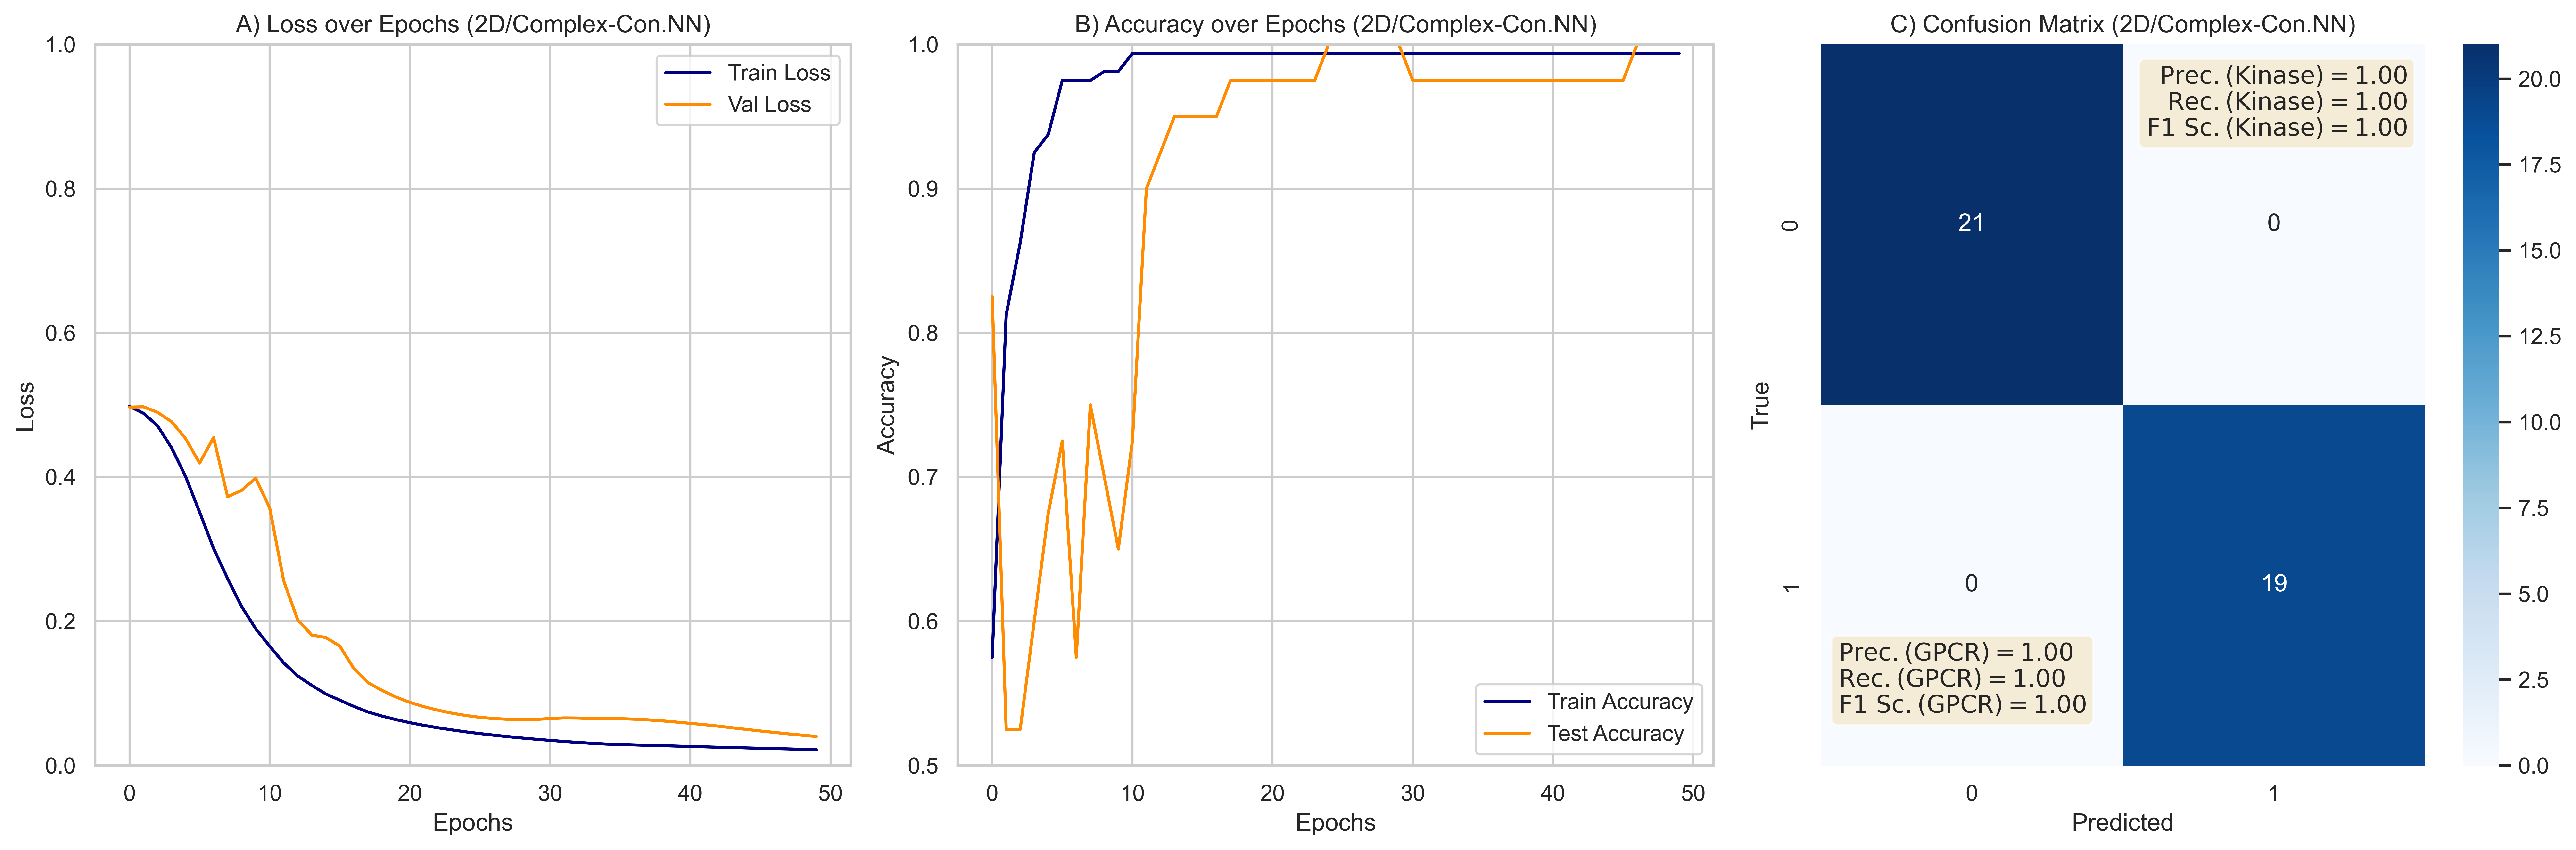

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Tahmin edilen ve gerçek değerlerin sınıflandırılması
y_pred_classes = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_classes, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Karışıklık matrisi hesaplama
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Her sınıf için Precision, Recall ve F1 Skorlarını hesaplama
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0)
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0)
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0)

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1)
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1)
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1)

# Metriklerin metin olarak hazırlanması
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Eğitim ve doğrulama verilerindeki metriklerin hazırlanması
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Metriklerin hazırlanması
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average="macro"))))

# Görselleştirme
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

# Kayıp Grafiği
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (2D/Complex-Con.NN)')
ax[0].set_ylim(0.0, 1.0)

# Doğruluk Grafiği
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (2D/Complex-Con.NN)')
ax[1].set_ylim(0.5, 1.0)

# Karışıklık Matrisinin Görselleştirilmesi
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (2D/Complex-Con.NN)')

# Metin kutularının eklenmesi
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()


## STEP 7 (2D PROTEIN CLASSIFICATION with SVM):
### 2D complex image data representing kinase and GPCR proteins are classified using Support Vector Machines (SVM).



In [65]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from skimage import exposure

# Directory containing images
image_dir = "D:/2Dprotein_Pattern25_IMAGE"

# Lists for storing images and tags
images = []
labels = []

# Target image size
target_size = (64, 64)

# Read files within directory
for filename in os.listdir(image_dir):
    # Create file path
    file_path = os.path.join(image_dir, filename)
    
    # Upload image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Görüntüleri gri ölçekli olarak yükle
    if image is not None:
        # Resize the image to the target size before adding to the list
        image = cv2.resize(image, target_size)
        
        # Normalize image to the range [0, 1]
        image = exposure.equalize_hist(image).astype(np.float32)  # Daha düşük bellek kullanımı için float32
        
        images.append(image)
        
        # Remove tag from filename
        if 'label_1' in filename:
            labels.append(1)
        elif 'label_0' in filename:
            labels.append(0)

# Convert images and labels to numpy array
X = np.array(images, dtype=np.float32)  # Belleği azaltmak için float32
y = np.array(labels)

# Check the dimensions of the images (they should all be the same size)
print("Images shape:", X.shape)
print("Labels shape:", y.shape)

# Flatten images - SVM does not work with 2D data, requires 1D vectors
X_flat = X.reshape((X.shape[0], -1))

# Split the dataset (without random_state to ensure randomness in splits)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train)
X_test_flat = scaler.transform(X_test)

# Create and train SVM model with RBF kernel for non-linear decision boundaries
svm_model = SVC(kernel='rbf')  # Doğrusal olmayan kernel (rbf) kullanıyoruz
svm_model.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_flat)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Images shape: (200, 64, 64)
Labels shape: (200,)
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Confusion Matrix:
[[17  2]
 [ 0 21]]


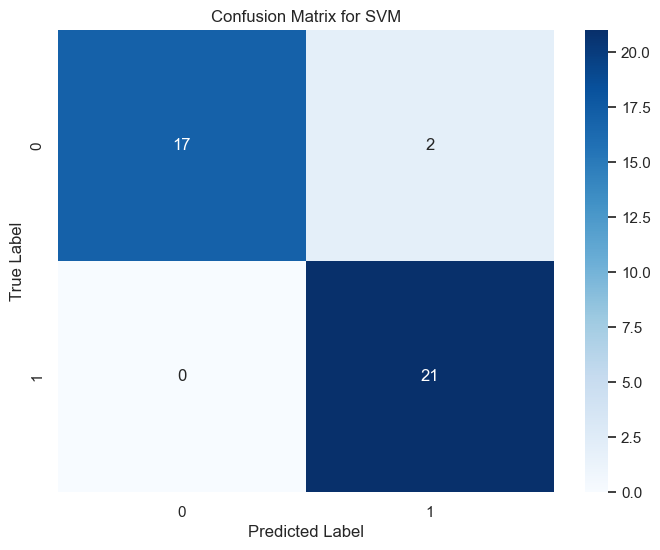

In [66]:
# Calculate confusion matrix FOR SVM

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


sns.set(style='whitegrid')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Plot ROC curve for binary classification (SVM):

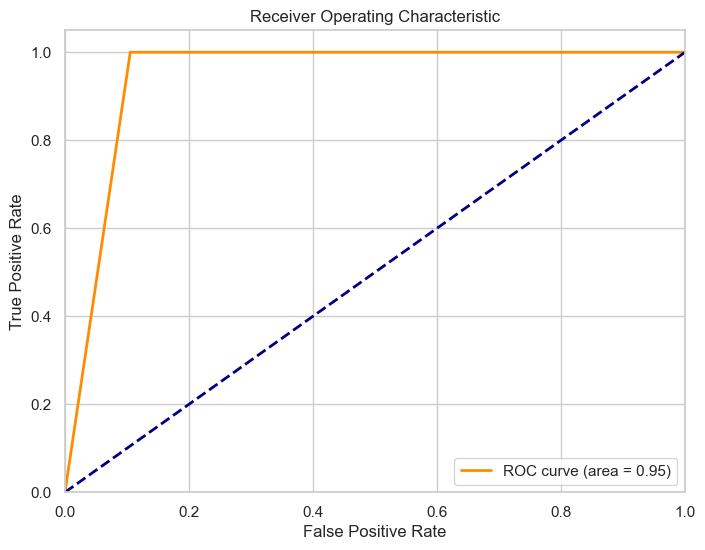

In [67]:
# plot ROC curve for binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## STEP 8 (2D PROTEIN CLASSIFICATION with RF):
### 2D complex image data representing kinase and GPCR proteins are classified using Random Forest (RF).

In [52]:
#random forest (RF), 
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lists for storing images and tags
images = []
labels = []

# Directory containing images
image_dir = "D:/2Dprotein_Pattern25_IMAGE"

# Browse all image files
for filename in os.listdir(image_dir):
    # Dosya yolu
    file_path = os.path.join(image_dir, filename)
    
    # Read image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize image (e.g. 64x64)
    image_resized = cv2.resize(image, (64, 64))
    
    # Add the image and its tag to lists
    images.append(image_resized)
    
    # Get the label from the filename (e.g. "plot_1_label_1.png" => 1)
    label = int(filename.split('_')[-1].split('.')[0])
    labels.append(label)

# Convert lists to numpy array
X = np.array(images)
y = np.array(labels)

# Flatten images
X_flat = X.reshape(X.shape[0], -1)

# Separate the data into training and test sets, no fixed random_state
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2)

# Train Random Forest model without fixed random_state
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make a prediction on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.9
Confusion Matrix:
[[13  2]
 [ 2 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.92      0.92      0.92        25

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



#### 2D protein classification with RF (Confusion Matrix Result):

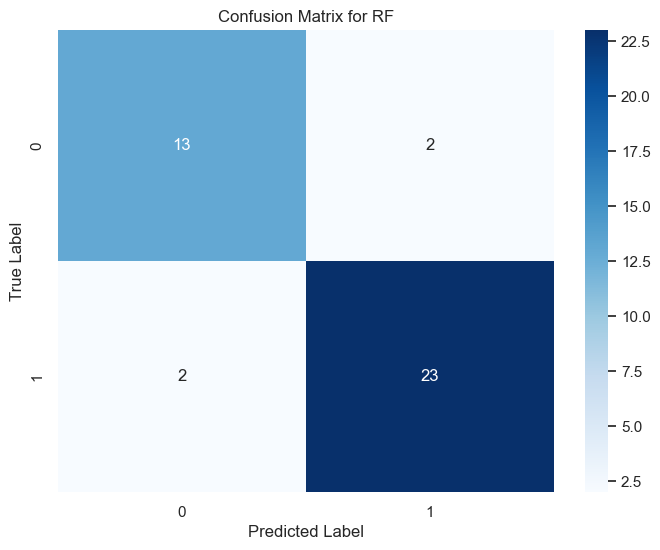

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Seaborn settings
sns.set(style='whitegrid')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### STATISTICAL ANALYSIS


### Means and standard deviations of the Test Accuracy results of 10 runs of the machine learning methods were calculated:

In [47]:
import numpy as np

# Veriler
comp_evrs_acc = [0.975, 0.95, 0.975, 0.9, 0.975, 0.9, 0.975, 0.9, 0.975, 1.0]
reel_evrs_acc = [0.93, 0.93, 0.93, 0.97, 0.95, 0.95, 0.97, 0.95, 0.93, 0.88]
svm_acc = [0.97, 0.90, 0.97, 0.88, 0.93, 0.97, 0.88, 0.90, 0.95, 0.95]
rf_acc = [0.88, 0.88, 0.85, 0.93, 0.82, 0.95, 0.88, 0.97, 0.88, 0.85]

# Ortalama ve Standart Sapma Hesaplama Fonksiyonu
def hesapla_ortalama_std(values, label):
    ortalama = np.mean(values)
    std_sapma = np.std(values)
    print(f"{label} için:")
    print(f"Ortalama = {ortalama:.3f}")
    print(f"Standart Sapma = {std_sapma:.3f}\n")

# Hesaplama ve Yazdırma
hesapla_ortalama_std(comp_evrs_acc, "Comp. Evrşm. Accuracy")
hesapla_ortalama_std(reel_evrs_acc, "Reel Evrşm. Accuracy")
hesapla_ortalama_std(svm_acc, "SVM Accuracy")
hesapla_ortalama_std(rf_acc, "RF Accuracy")


Comp. Evrşm. Accuracy için:
Ortalama = 0.953
Standart Sapma = 0.036

Reel Evrşm. Accuracy için:
Ortalama = 0.939
Standart Sapma = 0.025

SVM Accuracy için:
Ortalama = 0.930
Standart Sapma = 0.035

RF Accuracy için:
Ortalama = 0.889
Standart Sapma = 0.045



### It was checked whether the Test Accuracy results obtained from 10 runs of machine learning methods were normally distributed:

In [41]:
from scipy.stats import shapiro

# Normallik testi için veri kümeleri
comp_evrs_acc = [0.975, 0.95, 0.975, 0.9, 0.975, 0.9, 0.975, 0.9, 0.975, 1.0]
reel_evrs_acc = [0.93, 0.93, 0.93, 0.97, 0.95, 0.95, 0.97, 0.95, 0.93, 0.88]
svm_acc = [0.97, 0.90, 0.97, 0.88, 0.93, 0.97, 0.88, 0.90, 0.95, 0.95]
rf_acc = [0.88, 0.88, 0.85, 0.93, 0.82, 0.95, 0.88, 0.97, 0.88, 0.85]

# Shapiro-Wilk testi
_, p_comp = shapiro(comp_evrs_acc)
_, p_reel = shapiro(reel_evrs_acc)
_, p_svm = shapiro(svm_acc)
_, p_rf = shapiro(rf_acc)

print("Shapiro-Wilk Testi Sonuçları:")
print(f"Comp. Evrşm. p-değeri: {p_comp:.3f}")
print(f"Reel Evrşm. p-değeri: {p_reel:.3f}")
print(f"SVM p-değeri: {p_svm:.3f}")
print(f"RF p-değeri: {p_rf:.3f}")

# Normallik testi değerlendirmesi
alpha = 0.05
print("\nNormallik Testi Değerlendirmesi:")
print(f"Comp. Evrşm.: {'Normal Dağılıyor' if p_comp > alpha else 'Normal Dağılım Göstermiyor'}")
print(f"Reel Evrşm.: {'Normal Dağılıyor' if p_reel > alpha else 'Normal Dağılım Göstermiyor'}")
print(f"SVM: {'Normal Dağılıyor' if p_svm > alpha else 'Normal Dağılım Göstermiyor'}")
print(f"RF: {'Normal Dağılıyor' if p_rf > alpha else 'Normal Dağılım Göstermiyor'}")


Shapiro-Wilk Testi Sonuçları:
Comp. Evrşm. p-değeri: 0.009
Reel Evrşm. p-değeri: 0.075
SVM p-değeri: 0.074
RF p-değeri: 0.374

Normallik Testi Değerlendirmesi:
Comp. Evrşm.: Normal Dağılım Göstermiyor
Reel Evrşm.: Normal Dağılıyor
SVM: Normal Dağılıyor
RF: Normal Dağılıyor


### It was investigated whether there was a statistically significant difference between them with the "Nonparametric Kruskal-Wallis H Test".

### If a significant difference is detected between the groups, Post-Hoc Test- Dunn's Test is performed to determine which groups this difference is between.

In [ ]:
pip install scikit-posthocs

In [40]:
import numpy as np
from scipy.stats import kruskal

# Veriler (Accuracy sonuçları)
comp_evrs_acc = [0.975, 0.95, 0.975, 0.9, 0.975, 0.9, 0.975, 0.9, 0.975, 1.0]
reel_evrs_acc = [0.93, 0.93, 0.93, 0.97, 0.95, 0.95, 0.97, 0.95, 0.93, 0.88]
svm_acc = [0.97, 0.90, 0.97, 0.88, 0.93, 0.97, 0.88, 0.90, 0.95, 0.95]
rf_acc = [0.88, 0.88, 0.85, 0.93, 0.82, 0.95, 0.88, 0.97, 0.88, 0.85]

# Kruskal-Wallis H Testi
stat, p_value = kruskal(comp_evrs_acc, reel_evrs_acc, svm_acc, rf_acc)

# Sonuçları yazdır
print("Kruskal-Wallis H Testi Sonuçları:")
print(f"H-statistic: {stat:.3f}")
print(f"p-değeri: {p_value:.3f}")

# Hipotez testi değerlendirmesi
if p_value < 0.05:
    print("Sonuç: Gruplar arasında anlamlı bir farklılık vardır (p < 0.05).")
else:
    print("Sonuç: Gruplar arasında anlamlı bir farklılık yoktur (p >= 0.05).")


Kruskal-Wallis H Testi Sonuçları:
H-statistic: 12.310
p-değeri: 0.006
Sonuç: Gruplar arasında anlamlı bir farklılık vardır (p < 0.05).


In [45]:
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp
import pandas as pd

# Veriler (Accuracy sonuçları)
comp_evrs_acc = [0.975, 0.95, 0.975, 0.9, 0.975, 0.9, 0.975, 0.9, 0.975, 1.0]
reel_evrs_acc = [0.93, 0.93, 0.93, 0.97, 0.95, 0.95, 0.97, 0.95, 0.93, 0.88]
svm_acc = [0.97, 0.90, 0.97, 0.88, 0.93, 0.97, 0.88, 0.90, 0.95, 0.95]
rf_acc = [0.88, 0.88, 0.85, 0.93, 0.82, 0.95, 0.88, 0.97, 0.88, 0.85]

# Kruskal-Wallis H Testi
stat, p_value = kruskal(comp_evrs_acc, reel_evrs_acc, svm_acc, rf_acc)

print("Kruskal-Wallis H Testi Sonuçları:")
print(f"H-statistic: {stat:.3f}")
print(f"p-değeri: {p_value:.3f}")

# Hipotez testi değerlendirmesi
if p_value < 0.05:
    print("Sonuç: Gruplar arasında anlamlı bir farklılık vardır (p < 0.05).")
    
    # Dunn's testi için verilerin hazırlanması
    data = pd.DataFrame({
        'Comp. Evrşm.': comp_evrs_acc,
        'Reel Evrşm.': reel_evrs_acc,
        'SVM': svm_acc,
        'RF': rf_acc
    })

    # Dunn's Post Hoc Testi
    dunn_results = sp.posthoc_dunn(data.melt(), val_col='value', group_col='variable', p_adjust='bonferroni')
    print("\nDunn's Testi Sonuçları (Bonferroni düzeltmeli p-değerleri):")
    print(dunn_results)
else:
    print("Sonuç: Gruplar arasında anlamlı bir farklılık yoktur (p >= 0.05).")


Kruskal-Wallis H Testi Sonuçları:
H-statistic: 12.310
p-değeri: 0.006
Sonuç: Gruplar arasında anlamlı bir farklılık vardır (p < 0.05).

Dunn's Testi Sonuçları (Bonferroni düzeltmeli p-değerleri):
              Comp. Evrşm.        RF  Reel Evrşm.       SVM
Comp. Evrşm.      1.000000  0.003014     1.000000  0.578562
RF                0.003014  1.000000     0.200839  0.415236
Reel Evrşm.       1.000000  0.200839     1.000000  1.000000
SVM               0.578562  0.415236     1.000000  1.000000


#### Sonuç olarak, 
- Tüm makine öğrenme yöntemleri 2B protein temsilllerini çok yüksek bir başarı ile sınıflandırmayı başarmışlardır. Yapılan karşılaştırmalı istatistiksel analizde ise Kompleks Değerli 2B Evrişimli Ağ (Comp. Evrşm.), 2B protein görüntülerini sınıflandırırken diğer yöntemlere kıyasla özellikle Random Forest'tan daha yüksek performans göstermiştir. Ancak diğer makine öğrenme yöntemleri de önerilen kompleks tabanlı 2B protein görselleştirme yöntemi ile temsil edilen proteinleri sınıflandırmada Kompleks ağlara yakın bir performans göstermiştir.Önerilen 2B prottein temsil yöntemi her dört makine öğrenme yönteminde de protein sınıflandırmada proteinleri oldukça etkili bir şekilde temsil edebildiğini göstermiştir.